In [89]:
print("Importing Packages... \n")
using YAML
using Images
using PyCall
using FFTW
using LinearAlgebra
using JLD2
using PyPlot

plt.style.use("light_mode")

Importing Packages... 


In [90]:
config = YAML.load_file("../config.yaml")

Dict{Any, Any} with 16 entries:
  "DM_particle_mass_Dark" => 0.00472716
  "run_name"              => "density_cube_snap_099_full_1024_all_species"
  "xmin"                  => 0.0
  "num_scales"            => 10
  "GAS_particle_mass_TNG" => 0.000743736
  "output_directory"      => "/global/cscratch1/sd/james12/NEXUS_analysis/Full_…
  "nx"                    => 1024
  "N_GAS"                 => 15625000000
  "num_snaps"             => 1
  "snapfile_root"         => 99
  "algorithm"             => "NEXUS+"
  "input_directory"       => "/global/cscratch1/sd/james12/Illustris_TNG_Data/T…
  "simulation_type"       => "All"
  "DM_particle_mass_TNG"  => 0.00398343
  "N_DM"                  => 15625000000
  "xmax"                  => 205000.0

# Log of Tagging Exploring:

### RUN 1:

Default Parameters, everything is the same as it was in the original NEXUS/NEXUSPLUS analysis

**Filaments:**

Max dM is 3.15e17 

Corresponding Index is 19 


**Walls:**

Max dM is 9.00e16 

Corresponding Index is 17 


### RUN 2:

Everything is the same as RUN 1 but we increase the filament threshold by shifting rightward by 2 indeces (basically doubling the threshold)


**Filaments:**

Max dM is 3.15e17

Corresponding Index is 21

**Walls:**

Max dM is 1.74e17

Corresponding Index is 18
 

### RUN 3:

Do the same process as RUN 2 but do it to the walls only

**Filaments:**

Max dM is 3.15e17

Corresponding Index is 19

**Walls:**

Max dM is 9.00e16

Corresponding Index is 19

### RUN 4: 

Do both RUN 2 and RUN 3

**Filaments:**

Max dM is 3.15e17

Corresponding Index is 21


**Walls:**

Max dM is 1.74e17

Corresponding Index is 20

In [91]:
#load in data and reduce size for example
@load config["input_directory"] * config["run_name"] * ".jld2" den

1-element Vector{Symbol}:
 :den

# RUN 1

In [92]:
print("Saving Structure Boolean Filters... \n")
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_cluster_bool_filter.jld2" clusbool
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_filament_bool_filter.jld2" filbool
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_wall_bool_filter.jld2" wallbool
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_S_fil.jld2" S_fil
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_dM2_fil.jld2" dM2_fil
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_S_wall.jld2" S_wall
@load config["output_directory"]*"Tagging_Testing/RUN1/"*config["run_name"]*"_dM2_wall.jld2" dM2_wall

Saving Structure Boolean Filters... 


1-element Vector{Symbol}:
 :dM2_wall

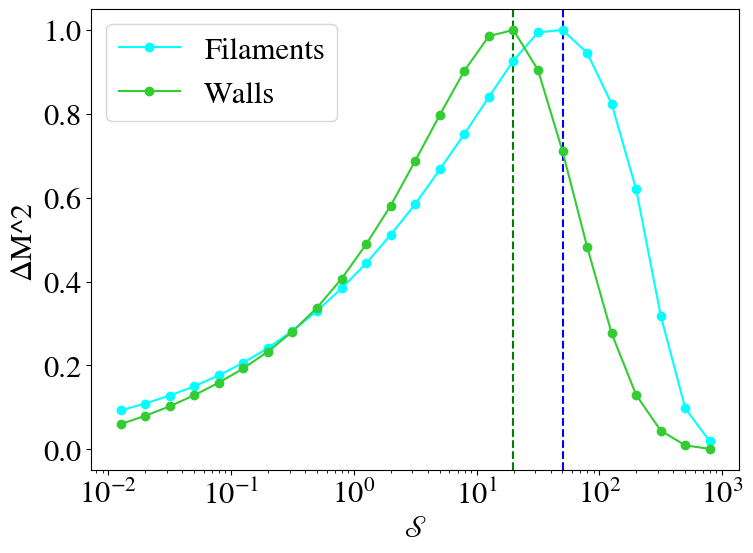

In [93]:
filament_thresh = S_fil[19]
wall_thresh = S_wall[17]

f, (ax1) = plt.subplots(1,1, figsize=(8,6))

ax1.axvline(wall_thresh, color="green", linestyle="--")
ax1.axvline(filament_thresh, color="blue", linestyle="--")

ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), marker="o", linestyle="-", color="cyan", label="Filaments")
ax1.plot(S_wall, dM2_wall ./ maximum(dM2_wall), marker="o", linestyle="-", color="limegreen", label="Walls")

ax1.set_xscale("log")
ax1.set_ylabel("ΔM^2")
ax1.set_xlabel("𝒮")
ax1.set_xscale("log")
ax1.legend()
f.tight_layout()
plt.savefig("RUN1_plot.png" , dpi = 300)

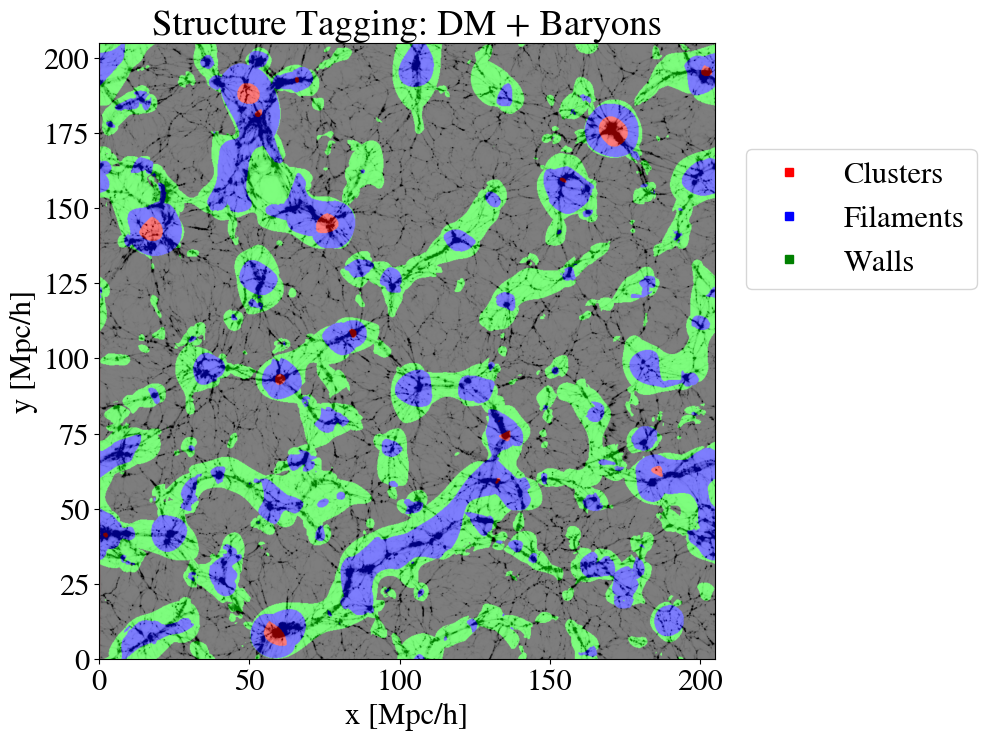

In [94]:
fig, ax = subplots(1,1,figsize=(14,8))

slice = 512
densq = -clamp.(den[:,:,slice], 0, 3)/3 .+ 1 # density plot
densq ./= 2
ax.set_title("Structure Tagging: DM + Baryons")
ax.set_xlabel("x [Mpc/h]")
ax.set_ylabel("y [Mpc/h]")

ax.imshow(  cat( [
            transpose(clamp.(densq + (clusbool[:,:,slice])[:,:,1] / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) , origin="lower",extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

plt.axvline()

plt.plot([],[],"rs", label="Clusters")
plt.plot([],[], "bs", label="Filaments")
plt.plot([],[], "gs", label="Walls")
plt.legend(loc=(1.05,0.6))
plt.savefig("RUN1_img.png" , dpi = 300)
plt.show()

# RUN 2

In [95]:
print("Saving Structure Boolean Filters... \n")
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_cluster_bool_filter.jld2" clusbool
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_filament_bool_filter.jld2" filbool
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_wall_bool_filter.jld2" wallbool
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_S_fil.jld2" S_fil
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_dM2_fil.jld2" dM2_fil
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_S_wall.jld2" S_wall
@load config["output_directory"]*"Tagging_Testing/RUN2/"*config["run_name"]*"_dM2_wall.jld2" dM2_wall

Saving Structure Boolean Filters... 


1-element Vector{Symbol}:
 :dM2_wall

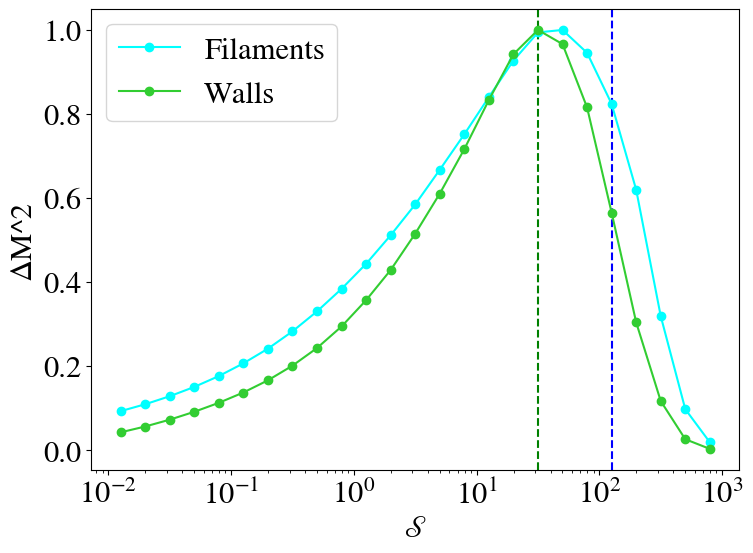

In [96]:
filament_thresh = S_fil[21]
wall_thresh = S_wall[18]

f, (ax1) = plt.subplots(1,1, figsize=(8,6))

ax1.axvline(wall_thresh, color="green", linestyle="--")
ax1.axvline(filament_thresh, color="blue", linestyle="--")

ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), marker="o", linestyle="-", color="cyan", label="Filaments")
ax1.plot(S_wall, dM2_wall ./ maximum(dM2_wall), marker="o", linestyle="-", color="limegreen", label="Walls")

ax1.set_xscale("log")
ax1.set_ylabel("ΔM^2")
ax1.set_xlabel("𝒮")
ax1.set_xscale("log")
ax1.legend()
f.tight_layout()
plt.savefig("RUN2_plot.png" , dpi = 300)

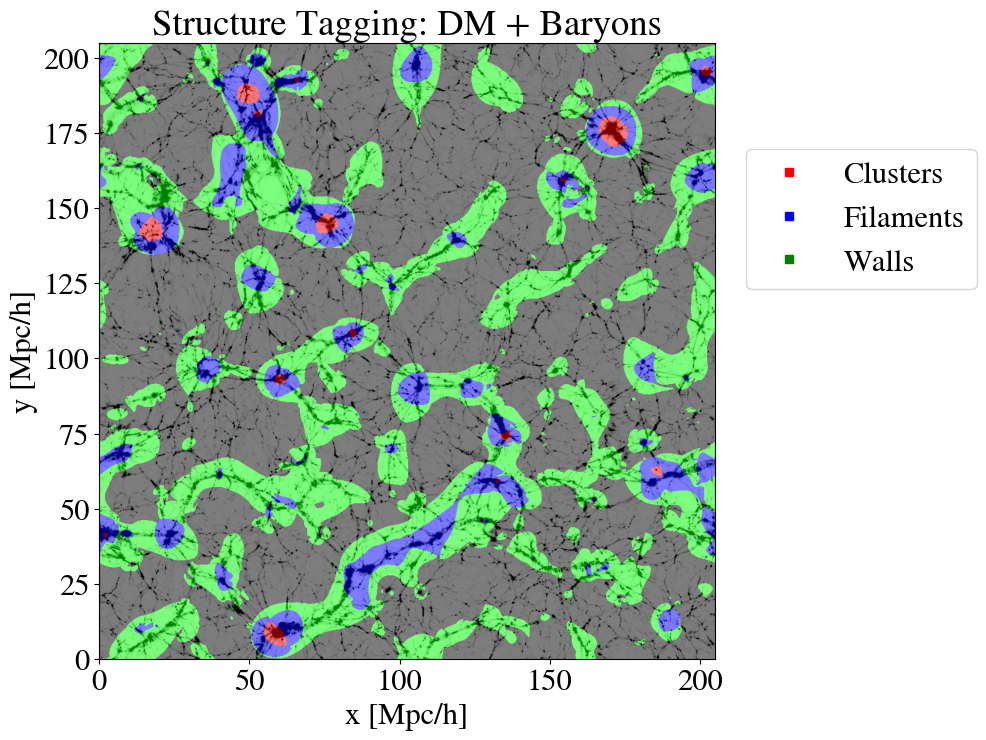

In [97]:
fig, ax = subplots(1,1,figsize=(14,8))

slice = 512
densq = -clamp.(den[:,:,slice], 0, 3)/3 .+ 1 # density plot
densq ./= 2
ax.set_title("Structure Tagging: DM + Baryons")
ax.set_xlabel("x [Mpc/h]")
ax.set_ylabel("y [Mpc/h]")

ax.imshow(  cat( [
            transpose(clamp.(densq + (clusbool[:,:,slice])[:,:,1] / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) , origin="lower",extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

plt.axvline()

plt.plot([],[],"rs", label="Clusters")
plt.plot([],[], "bs", label="Filaments")
plt.plot([],[], "gs", label="Walls")
plt.legend(loc=(1.05,0.6))
plt.savefig("RUN2_img.png" , dpi = 300)
plt.show()

# RUN 3

In [98]:
print("Saving Structure Boolean Filters... \n")
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_cluster_bool_filter.jld2" clusbool
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_filament_bool_filter.jld2" filbool
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_wall_bool_filter.jld2" wallbool
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_S_fil.jld2" S_fil
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_dM2_fil.jld2" dM2_fil
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_S_wall.jld2" S_wall
@load config["output_directory"]*"Tagging_Testing/RUN3/"*config["run_name"]*"_dM2_wall.jld2" dM2_wall

Saving Structure Boolean Filters... 


1-element Vector{Symbol}:
 :dM2_wall

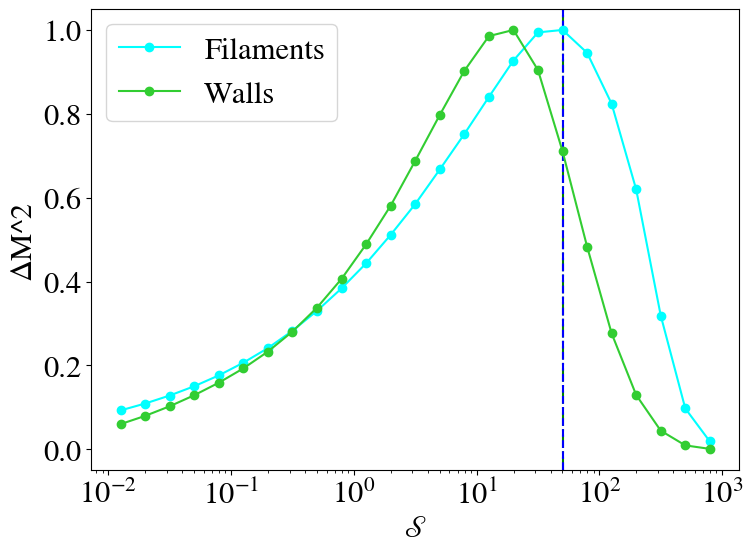

In [99]:
filament_thresh = S_fil[19]
wall_thresh = S_wall[19]

f, (ax1) = plt.subplots(1,1, figsize=(8,6))

ax1.axvline(wall_thresh, color="green", linestyle="-.")
ax1.axvline(filament_thresh, color="blue", linestyle="--")

ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), marker="o", linestyle="-", color="cyan", label="Filaments")
ax1.plot(S_wall, dM2_wall ./ maximum(dM2_wall), marker="o", linestyle="-", color="limegreen", label="Walls")

ax1.set_xscale("log")
ax1.set_ylabel("ΔM^2")
ax1.set_xlabel("𝒮")
ax1.set_xscale("log")
ax1.legend()
f.tight_layout()
plt.savefig("RUN3_plot.png" , dpi = 300)

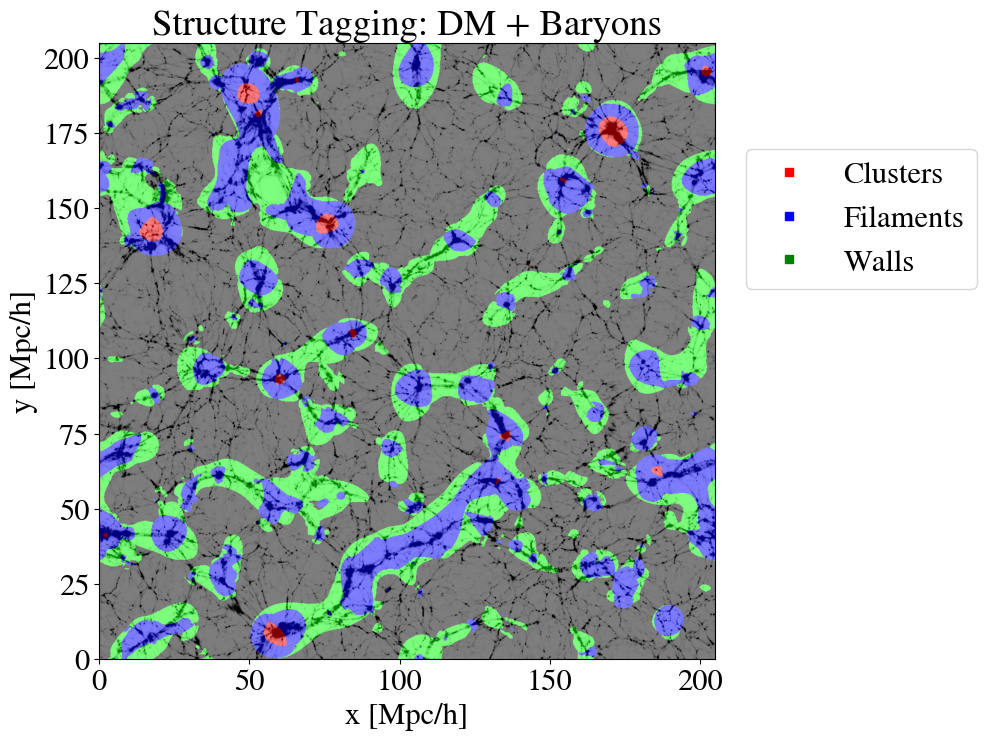

In [100]:
fig, ax = subplots(1,1,figsize=(14,8))

slice = 512
densq = -clamp.(den[:,:,slice], 0, 3)/3 .+ 1 # density plot
densq ./= 2
ax.set_title("Structure Tagging: DM + Baryons")
ax.set_xlabel("x [Mpc/h]")
ax.set_ylabel("y [Mpc/h]")

ax.imshow(  cat( [
            transpose(clamp.(densq + (clusbool[:,:,slice])[:,:,1] / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) , origin="lower",extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

plt.axvline()

plt.plot([],[],"rs", label="Clusters")
plt.plot([],[], "bs", label="Filaments")
plt.plot([],[], "gs", label="Walls")
plt.legend(loc=(1.05,0.6))
plt.savefig("RUN3_img.png" , dpi = 300)
plt.show()

# RUN 4

In [101]:
print("Saving Structure Boolean Filters... \n")
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_cluster_bool_filter.jld2" clusbool
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_filament_bool_filter.jld2" filbool
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_wall_bool_filter.jld2" wallbool
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_S_fil.jld2" S_fil
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_dM2_fil.jld2" dM2_fil
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_S_wall.jld2" S_wall
@load config["output_directory"]*"Tagging_Testing/RUN4/"*config["run_name"]*"_dM2_wall.jld2" dM2_wall

Saving Structure Boolean Filters... 


1-element Vector{Symbol}:
 :dM2_wall

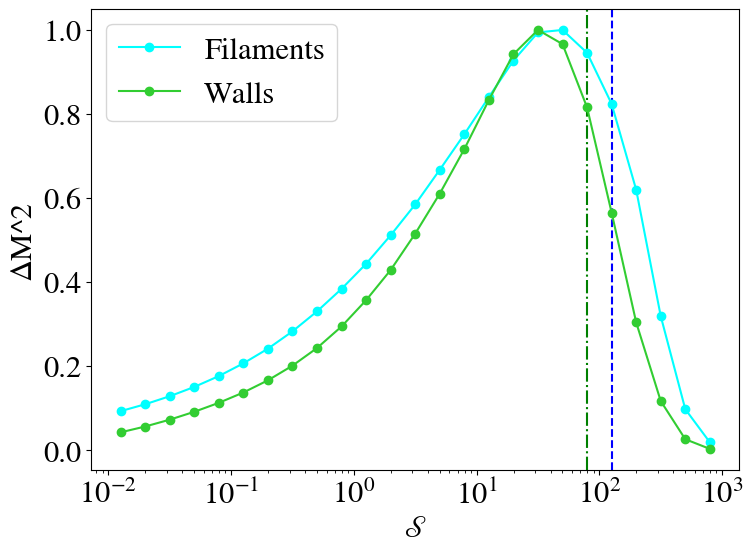

In [102]:
filament_thresh = S_fil[21]
wall_thresh = S_wall[20]

f, (ax1) = plt.subplots(1,1, figsize=(8,6))

ax1.axvline(wall_thresh, color="green", linestyle="-.")
ax1.axvline(filament_thresh, color="blue", linestyle="--")

ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), marker="o", linestyle="-", color="cyan", label="Filaments")
ax1.plot(S_wall, dM2_wall ./ maximum(dM2_wall), marker="o", linestyle="-", color="limegreen", label="Walls")

ax1.set_xscale("log")
ax1.set_ylabel("ΔM^2")
ax1.set_xlabel("𝒮")
ax1.set_xscale("log")
ax1.legend()
f.tight_layout()
plt.savefig("RUN4_plot.png" , dpi = 300)

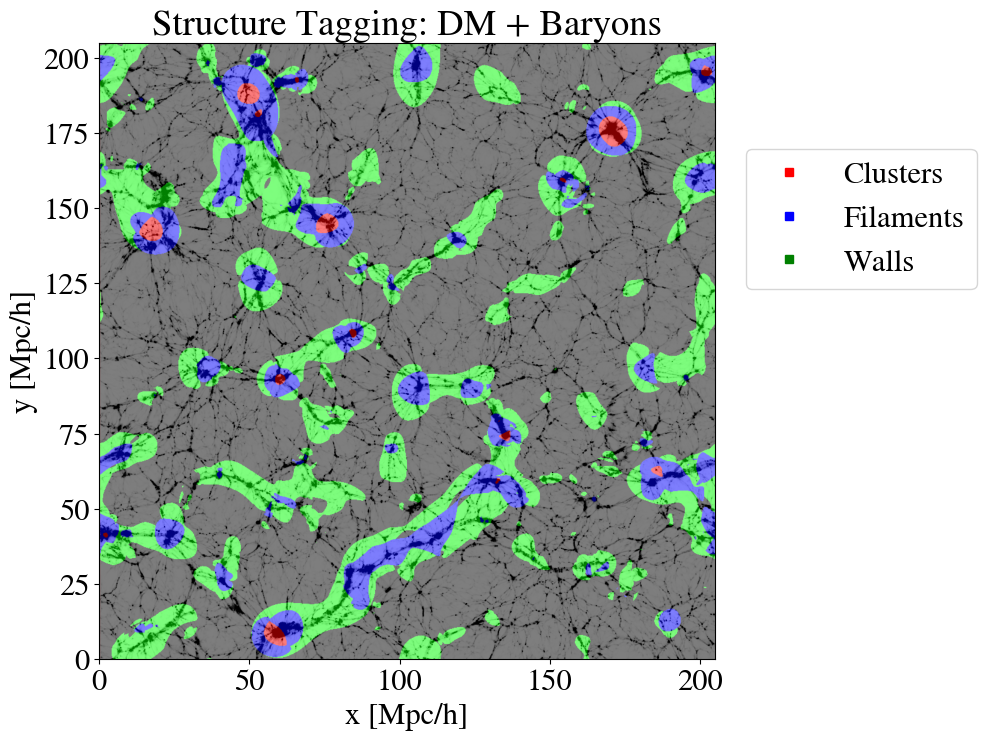

In [103]:
fig, ax = subplots(1,1,figsize=(14,8))

slice = 512
densq = -clamp.(den[:,:,slice], 0, 3)/3 .+ 1 # density plot
densq ./= 2
ax.set_title("Structure Tagging: DM + Baryons")
ax.set_xlabel("x [Mpc/h]")
ax.set_ylabel("y [Mpc/h]")

ax.imshow(  cat( [
            transpose(clamp.(densq + (clusbool[:,:,slice])[:,:,1] / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) , origin="lower",extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

plt.axvline()

plt.plot([],[],"rs", label="Clusters")
plt.plot([],[], "bs", label="Filaments")
plt.plot([],[], "gs", label="Walls")
plt.legend(loc=(1.05,0.6))
plt.savefig("RUN4_img.png" , dpi = 300)
plt.show()